In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [2]:
def portfolio_variance(weights, cov_matrix):
    """포트폴리오 분산 계산 (표준편차)"""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # 연간화 위해 252 곱함

def portfolio_return(weights, returns):
    """포트폴리오 기대 수익률 계산"""
    return np.sum(returns * weights) * 252  # 연간화 위해 252 곱함

def minimize_risk(weights, cov_matrix, returns, target_return):
    """목표 수익률 하에서 리스크 최소화"""
    return portfolio_variance(weights, cov_matrix)

def optimize_portfolio(returns, cov_matrix, target_return, bounds, constraints):
    """포트폴리오 최적화"""
    init_guess = np.array([1.0 / len(returns)] * len(returns))  # 초기 가중치: 균등 분배
    result = minimize(
        fun=minimize_risk,
        x0=init_guess,
        args=(cov_matrix, returns, target_return),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

In [3]:
# 데이터
# Ch5. p35 의 Calculate Return & Covariance(Raw data, % 제외)
data = {
    'SS': [
        -0.003598, 0.031389, -0.019930, 0.042594, 0.027148, -0.058507, 0.048242, 0.005460, -0.012154, -0.009424,
         0.004493, -0.055775, 0.026470, 0.014387, 0.004817, 0.002130, 0.049429, -0.015953, 0.034483, 0.006965,
         0.003953, 0.045768, 0.008941, 0.030317, -0.007696, -0.025091, 0.035798, 0.087192, 0.015375, -0.006343,
        -0.003707, 0.032038, 0.075105, 0.074702, 0.010920, -0.011660, -0.038688, -0.009204, 0.047905, -0.032852,
        -0.027318, -0.086290, -0.009100, 0.011020, 0.022810, -0.166765, 0.072714, -0.034003, -0.056457, -0.043847,
         0.087408, -0.020503, 0.142008, -0.015413, 0.038502, -0.021593, 0.110139, -0.007314, 0.080673, -0.003497

    ],
    'SKH': [
          0.029692, -0.024030, 0.028409, -0.081031, 0.039279, -0.082530, 0.018495, -0.017747, -0.042017, 0.010088,
          0.023013, -0.028438, 0.055920, 0.105916, -0.003741, 0.002629, 0.091011, -0.016478, -0.010471, -0.001411,
          0.042741, 0.017615, 0.050599, 0.046261, 0.026348, -0.026261, 0.005455, 0.015973, 0.013053, -0.036603,
         -0.033435, 0.018239, 0.023471, 0.006940, -0.042853, -0.015654, -0.075700, 0.086373, -0.031992, 0.033704,
          0.036087, -0.071494, -0.027312, 0.065968, -0.051412, -0.155570, -0.131141, 0.022800, -0.088720, -0.188845,
          0.082630, 0.206128, 0.105774, -0.036759, 0.076756, 0.036649, 0.054779, -0.003315, 0.104213, 0.079317

    ],
    'NAVER': [
        -0.065414, 0.129157, -0.052397, -0.027467, 0.016351, 0.070932, -0.019802, 0.037269, 0.083277, -0.120273,
        0.050740, 0.044601, 0.101445, -0.130283, 0.023123, 0.070423, -0.008262, -0.018821, 0.053774, 0.065055,
        -0.072289, 0.012383, 0.032816, 0.002311, -0.028530, 0.002670, -0.056509, -0.054563, 0.003317, -0.003306,
        0.131012, -0.020235, 0.163723, 0.051440, -0.036204, 0.036294, 0.240020, -0.011851, -0.123326, -0.137483,
        0.039387, 0.164293, -0.069681, -0.147922, 0.054836, -0.292842, 0.378648, 0.185423, 0.032098, -0.166667,
        0.061235, -0.153294, 0.204446, -0.053667, -0.039004, 0.004272, 0.072853, -0.038910, 0.156782, -0.075791
    ],
    'KAKAO': [
        -0.024159, -0.186025, -0.025867, -0.055734, 0.097342, -0.068150, 0.364461, -0.054264, 0.060890, -0.120088,
        0.215755, -0.027033, -0.049417, -0.164659, -0.024306, -0.036135, -0.017041, 0.117596, -0.304809, 0.146523,
        0.041842, 0.185866, 0.059071, -0.021815, -0.045362, 0.039023, 0.016607, 0.541342, 0.127344, -0.010558,
        0.148078, 0.017443, 0.165686, -0.042941, 0.015816, 0.022968, -0.161269, -0.170270, 0.105941, 0.102805,
        0.038026, -0.101568, 0.041047, 0.058554, -0.099616, -0.213304, -0.254018, 0.200937, 0.147036, 0.101496,
        0.133508, 0.096405, -0.031421, 0.072702, 0.025102, -0.053288, 0.149895, 0.272601, 0.143927, -0.010227
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 결측치 확인 및 처리 (KAKAO의 결측치가 없으므로 이 단계는 생략 가능)
# df['KAKAO'] = df['KAKAO'].fillna(df['KAKAO'].mean())

# 평균 수익률 계산
returns = df.mean()
print("평균 수익률 (일간):")
print(returns)

# 공분산 행렬 계산 (연간화 시에는 * 252)
cov_matrix = df.cov()
print("\n공분산 행렬 (연간화):")
print(cov_matrix)

평균 수익률 (일간):
SS       0.008810
SKH      0.005623
NAVER    0.012527
KAKAO    0.028338
dtype: float64

공분산 행렬 (연간화):
             SS       SKH     NAVER     KAKAO
SS     0.002392  0.001435  0.001872  0.001697
SKH    0.001435  0.004416 -0.000588  0.001851
NAVER  0.001872 -0.000588  0.011942 -0.001731
KAKAO  0.001697  0.001851 -0.001731  0.020546


In [4]:
# 엑셀 데이터: 평균 수익률과 공분산 행렬
returns = np.array([0.008810, 0.005623, 0.012527, 0.028338])
cov_matrix = np.array([
    [0.002392,  0.001435,  0.001872,  0.001697],
    [0.001435,  0.004416, -0.000588,  0.001851],
    [0.001872, -0.000588,  0.011942, -0.001731],
    [0.001697,  0.001851, -0.001731,  0.020546]
])

# 결과 출력
print("평균 수익률 (일간):")
print(pd.Series(returns, index=['SS', 'SKH', 'NAVER', 'KAKAO']))
print("\n공분산 행렬 (일간):")
print(pd.DataFrame(cov_matrix, index=['SS', 'SKH', 'NAVER', 'KAKAO'], columns=['SS', 'SKH', 'NAVER', 'KAKAO']))

# 연간화된 수익률과 공분산 행렬
annual_returns = returns * 252
annual_cov_matrix = cov_matrix * 252
print("\n연간화된 평균 수익률:")
print(pd.Series(annual_returns, index=['SS', 'SKH', 'NAVER', 'KAKAO']))
print("\n연간화된 공분산 행렬:")
print(pd.DataFrame(annual_cov_matrix, index=['SS', 'SKH', 'NAVER', 'KAKAO'], columns=['SS', 'SKH', 'NAVER', 'KAKAO']))

평균 수익률 (일간):
SS       0.008810
SKH      0.005623
NAVER    0.012527
KAKAO    0.028338
dtype: float64

공분산 행렬 (일간):
             SS       SKH     NAVER     KAKAO
SS     0.002392  0.001435  0.001872  0.001697
SKH    0.001435  0.004416 -0.000588  0.001851
NAVER  0.001872 -0.000588  0.011942 -0.001731
KAKAO  0.001697  0.001851 -0.001731  0.020546

연간화된 평균 수익률:
SS       2.220120
SKH      1.416996
NAVER    3.156804
KAKAO    7.141176
dtype: float64

연간화된 공분산 행렬:
             SS       SKH     NAVER     KAKAO
SS     0.602784  0.361620  0.471744  0.427644
SKH    0.361620  1.112832 -0.148176  0.466452
NAVER  0.471744 -0.148176  3.009384 -0.436212
KAKAO  0.427644  0.466452 -0.436212  5.177592


In [5]:
# 엑셀 데이터
returns = np.array([0.008810, 0.005623, 0.012527, 0.028338])  # SS, SKH, NAVER, KAKAO의 평균 수익률
cov_matrix = np.array([
    [0.002392,  0.001435,  0.001872,  0.001697],
    [0.001435,  0.004416, -0.000588,  0.001851],
    [0.001872, -0.000588,  0.011942, -0.001731],
    [0.001697,  0.001851, -0.001731,  0.020546]
])

In [6]:
# Plan 1.자산배분 비중: 25%,25%,25%,25%
weights = np.array([0.25, 0.25, 0.25, 0.25])

# 포트폴리오 성과 계산 함수
def portfolio_return(weights, returns):
    """포트폴리오 기대 수익률 계산 (일간, 비율로 반환)"""
    return np.sum(returns * weights)

def portfolio_variance(weights, cov_matrix):
    """포트폴리오 분산 계산 (일간)"""
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# 포트폴리오 성과 계산
port_return = portfolio_return(weights, returns)  # 일간 기대 수익률
port_variance = portfolio_variance(weights, cov_matrix)  # 일간 분산
port_std = np.sqrt(port_variance)  # 일간 표준편차
port_sharpe_ratio = port_return / port_std

# 연간화 (252 거래일 기준)
annual_port_return = port_return * 252
annual_port_std = port_std * np.sqrt(252)
annual_sharpe_ratio = port_sharpe_ratio * np.sqrt(252)

In [7]:
# Plan 1.자산배분 비중: 25%,25%,25%,25%
print("(Plan 1) 결과:")
print(f"포트폴리오 기대 수익률 (일간): {port_return:.4%}")

print(f"포트폴리오 분산 (일간): {port_variance:.4%}")
print(f"포트폴리오 표준편차 (일간): {port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (일간): {port_sharpe_ratio:.4%}")

(Plan 1) 결과:
포트폴리오 기대 수익률 (일간): 1.3824%
포트폴리오 분산 (일간): 0.3023%
포트폴리오 표준편차 (일간): 5.4982%
포트폴리오 샤프레이쇼 (일간): 25.1438%


In [8]:
# Plan 1.자산배분 비중: 25%,25%,25%,25%
print(f"포트폴리오 기대 수익률 (연간): {annual_port_return:.4%}")
print(f"포트폴리오 표준편차 (연간): {annual_port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (연간): {annual_sharpe_ratio:.4%}")

포트폴리오 기대 수익률 (연간): 348.3774%
포트폴리오 표준편차 (연간): 87.2809%
포트폴리오 샤프레이쇼 (연간): 399.1449%


In [9]:
# Plan 2.자산배분 비중: 10%,20%,30%,40%
weights = np.array([0.10, 0.20, 0.30, 0.40])


# 포트폴리오 성과 계산 함수
def portfolio_return(weights, returns):
    """포트폴리오 기대 수익률 계산 (일간, 비율로 반환)"""
    return np.sum(returns * weights)

def portfolio_variance(weights, cov_matrix):
    """포트폴리오 분산 계산 (일간)"""
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# 포트폴리오 성과 계산
port_return = portfolio_return(weights, returns)  # 일간 기대 수익률
port_variance = portfolio_variance(weights, cov_matrix)  # 일간 분산
port_std = np.sqrt(port_variance)  # 일간 표준편차
port_sharpe_ratio = port_return / port_std

# 연간화 (252 거래일 기준)
annual_port_return = port_return * 252
annual_port_std = port_std * np.sqrt(252)
annual_sharpe_ratio = port_sharpe_ratio * np.sqrt(252)

In [10]:
# Plan 2.자산배분 비중: 10%,20%,30%,40%
print("(Plan 2) 결과:")
print(f"포트폴리오 기대 수익률 (일간): {port_return:.4%}")

print(f"포트폴리오 분산 (일간): {port_variance:.4%}")
print(f"포트폴리오 표준편차 (일간): {port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (일간): {port_sharpe_ratio:.4%}")

(Plan 2) 결과:
포트폴리오 기대 수익률 (일간): 1.7099%
포트폴리오 분산 (일간): 0.4678%
포트폴리오 표준편차 (일간): 6.8398%
포트폴리오 샤프레이쇼 (일간): 24.9990%


In [11]:
# Plan 2.자산배분 비중: 10%,20%,30%,40%
print(f"포트폴리오 기대 수익률 (연간): {annual_port_return:.4%}")
print(f"포트폴리오 표준편차 (연간): {annual_port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (연간): {annual_sharpe_ratio:.4%}")

포트폴리오 기대 수익률 (연간): 430.8923%
포트폴리오 표준편차 (연간): 108.5791%
포트폴리오 샤프레이쇼 (연간): 396.8465%


In [12]:
# Plan 3.자산배분 비중: 10%,50%,30%,10%
weights = np.array([0.10, 0.50, 0.30, 0.10])


# 포트폴리오 성과 계산 함수
def portfolio_return(weights, returns):
    """포트폴리오 기대 수익률 계산 (일간, 비율로 반환)"""
    return np.sum(returns * weights)

def portfolio_variance(weights, cov_matrix):
    """포트폴리오 분산 계산 (일간)"""
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# 포트폴리오 성과 계산
port_return = portfolio_return(weights, returns)  # 일간 기대 수익률
port_variance = portfolio_variance(weights, cov_matrix)  # 일간 분산
port_std = np.sqrt(port_variance)  # 일간 표준편차
port_sharpe_ratio = port_return / port_std

# 연간화 (252 거래일 기준)
annual_port_return = port_return * 252
annual_port_std = port_std * np.sqrt(252)
annual_sharpe_ratio = port_sharpe_ratio * np.sqrt(252)

In [13]:
# Plan 3.자산배분 비중: 10%,50%,30%,10%
print("(Plan 3) 결과:")
print(f"포트폴리오 기대 수익률 (일간): {port_return:.4%}")

print(f"포트폴리오 분산 (일간): {port_variance:.4%}")
print(f"포트폴리오 표준편차 (일간): {port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (일간): {port_sharpe_ratio:.4%}")
# Plan 3.자산배분 비중: 10%,50%,30%,10%
print(f"포트폴리오 기대 수익률 (연간): {annual_port_return:.4%}")
print(f"포트폴리오 표준편차 (연간): {annual_port_std:.4%}")
print(f"포트폴리오 샤프레이쇼 (연간): {annual_sharpe_ratio:.4%}")

(Plan 3) 결과:
포트폴리오 기대 수익률 (일간): 1.0284%
포트폴리오 분산 (일간): 0.2603%
포트폴리오 표준편차 (일간): 5.1017%
포트폴리오 샤프레이쇼 (일간): 20.1587%
포트폴리오 기대 수익률 (연간): 259.1669%
포트폴리오 표준편차 (연간): 80.9874%
포트폴리오 샤프레이쇼 (연간): 320.0090%


In [14]:
#  데이터
returns = np.array([0.008810, 0.005623, 0.012527, 0.028338])
cov_matrix = np.array([
    [0.002392,  0.001435,  0.001872,  0.001697],
    [0.001435,  0.004416, -0.000588,  0.001851],
    [0.001872, -0.000588,  0.011942, -0.001731],
    [0.001697,  0.001851, -0.001731,  0.020546]
])
target_return = 0.01028

# 최적화 제약 조건
bounds = [(0, 1)] * len(returns)  # 가중치 0~1
constraints = [
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # 가중치 합 = 1
    {'type': 'ineq', 'fun': lambda w: portfolio_return(w, returns) - target_return}  # 기대 수익률 >= 목표
]

# 최적화 실행
result = optimize_portfolio(returns, cov_matrix, target_return, bounds, constraints)

if result.success:
    optimal_weights = result.x
    print("최적화된 가중치:")
    print(f"SS: {optimal_weights[0]:.4%}, SKH: {optimal_weights[1]:.4%}, NAVER: {optimal_weights[2]:.4%}, KAKAO: {optimal_weights[3]:.4%}")
    print(f"포트폴리오 기대 수익률: {portfolio_return(optimal_weights, returns):.4%}")
    print(f"포트폴리오 표준편차: {np.sqrt(portfolio_variance(optimal_weights, cov_matrix)):.4%}")
else:
    print("최적화 실패:", result.message)

최적화된 가중치:
SS: 37.2486%, SKH: 35.9914%, NAVER: 16.4990%, KAKAO: 10.2610%
포트폴리오 기대 수익률: 1.0280%
포트폴리오 표준편차: 4.6885%


In [15]:
# 효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오 (수익률 Min, 수익률 Max, 투자조합갯수)
# 파이썬 코드 예시 (마코위츠 기본 구현)
# 간단한 마코위츠 최적 포트폴리오 계산의 Python 코드 예시입니다.


Optimization (Basic) 3종목

In [16]:

import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 기대 수익률 (예시)
returns = np.array([0.10, 0.12, 0.15])

# 공분산 행렬 (예시)
cov_matrix = np.array([[0.005, -0.010, 0.004],
                       [-0.010, 0.040, -0.002],
                       [0.004, -0.002, 0.023]])

# 목적함수: 리스크 최소화
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# 초기 투자 비중 (균등)
init_weights = np.ones(len(returns)) / len(returns)

# 제약 조건: 합이 1, 목표 수익률 13%
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'eq', 'fun': lambda x: x @ returns - 0.13}]

# 경계 조건 (0~1)
bounds = [(0, 1)] * len(returns)

# 최적화 수행
result = minimize(portfolio_variance, init_weights,
                  args=(cov_matrix,), method='SLSQP',
                  constraints=constraints, bounds=bounds)

# 최적 포트폴리오 출력
optimal_weights = result.x
optimal_variance = result.fun
optimal_std = np.sqrt(optimal_variance)

print(f"Optimal Weights: {optimal_weights.round(4)}")
print(f"Portfolio Risk (Std.Dev): {optimal_std:.4f}")

Optimal Weights: [0.2623 0.2295 0.5082]
Portfolio Risk (Std.Dev): 0.0882


In [21]:
!pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
Tech_US =[ 'MSFT','NFLX','GOOG','AMZN','META','TSLA', 'AAPL' ] # 마이크로소프트 , 넷플릭스, 구글, 아마존 'NVDA', 'META', 'TSLA','AAPL’
Tech_KR =['005930','000660','035420','066570','207940','005380','105560'  ] #삼성, SK하이닉스, 네이버, LG전자, 삼성바이오, 현대차, kb금융

In [23]:
# 종가 불러오기
def get_price(companies, start='2021-05-31', end='2025-05-31'):
    df = pd.DataFrame()
    for code in companies:
        try:
            price = fdr.DataReader(code, start, end)['Close']
            df[code] = price
        except Exception as e:
            print(f"Error loading {code}: {e}")
    return df

In [24]:
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)

In [25]:
p_US

,MSFT,NFLX,GOOG,AMZN,META,TSLA,AAPL
2021-06-01,247.399994,499.079987,121.490501,160.932495,329.130005,207.966660,124.279999
2021-06-02,247.300003,499.239990,121.064003,161.699493,329.149994,201.706665,125.059998
2021-06-03,245.710007,489.429993,120.230499,159.350494,326.040009,190.946671,123.540001
2021-06-04,250.789993,494.739990,122.587997,160.311005,330.350006,199.683334,125.889999
2021-06-07,253.809998,494.660004,123.304497,159.900497,336.579987,201.710007,125.900002
...,...,...,...,...,...,...,...
2025-05-23,450.179993,1185.390015,169.589996,200.990005,627.059998,339.339996,195.270004
2025-05-27,460.690002,1211.569946,173.979996,206.020004,642.320007,362.890015,200.210007
2025-05-28,457.359985,1208.550049,173.380005,204.720001,643.580017,356.899994,200.419998
2025-05-29,458.679993,1184.859985,172.960007,205.699997,645.049988,358.429993,199.949997


In [26]:
p_KR

,005930,000660,035420,066570,207940,005380,105560
Date,,,,,,,
2021-05-31,80500,127000,362500,152000,835111,235000,58800
2021-06-01,80600,128500,367000,151500,822263,237000,58800
2021-06-02,80800,126000,363000,151500,808427,238000,58900
2021-06-03,82800,129000,362000,154500,814356,238500,58300
2021-06-04,82200,128500,357000,153500,830169,241500,57600
...,...,...,...,...,...,...,...
2025-05-26,54700,203000,188000,71600,1043000,181900,102000
2025-05-27,53900,202500,183800,69000,1026000,181900,101900
2025-05-28,55900,208000,187700,71200,1028000,185900,101000


<Axes: xlabel='Date'>

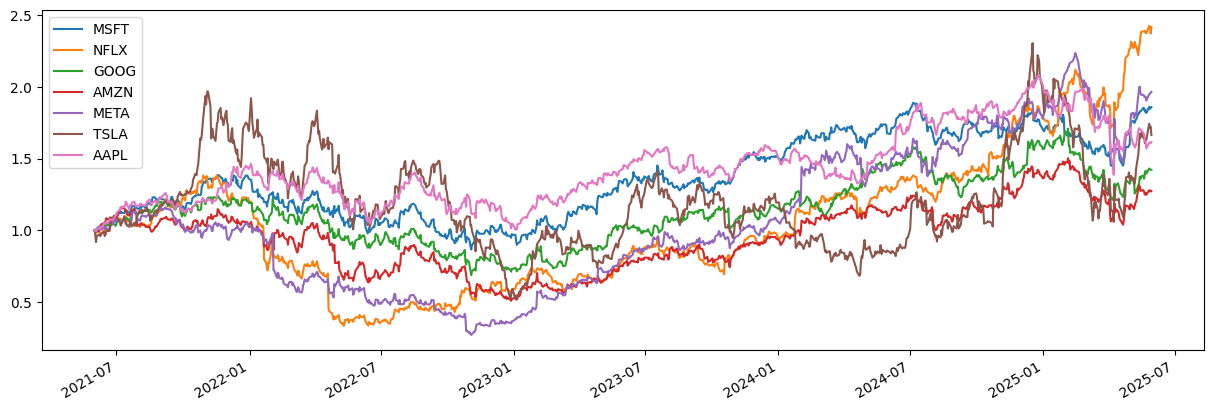

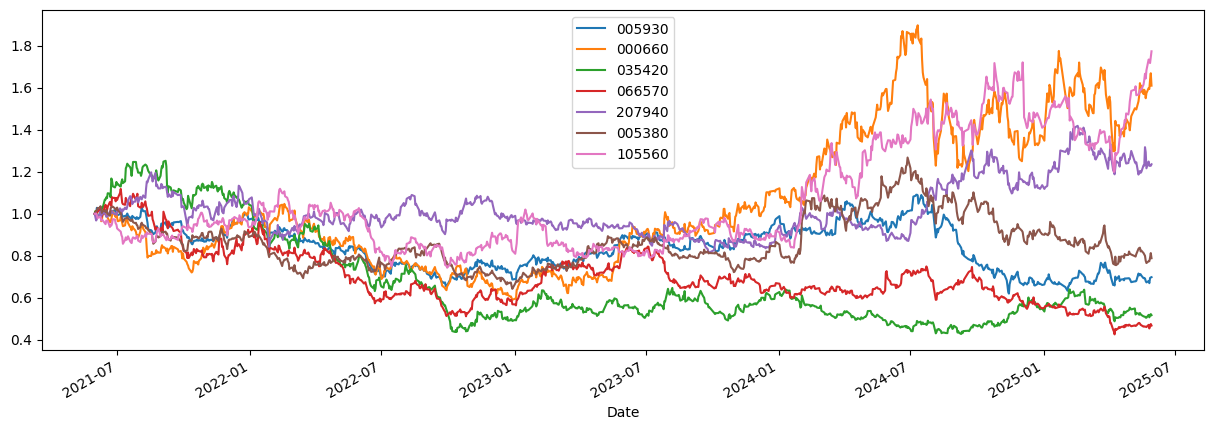

In [27]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))


In [28]:
# Return 계산
# Daily Return
r_US=p_US/p_US.shift()-1
r_KR=p_KR/p_KR.shift()-1

In [29]:
# Average Return (Total period)
r_a_US=(p_US.iloc[-1])/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1])/p_KR.iloc[0]-1

In [30]:
r_a_US


,0
MSFT,0.860792
NFLX,1.418911
GOOG,0.422745
AMZN,0.273888
META,0.967277
TSLA,0.665940
AAPL,0.616109


In [31]:
r_a_KR


,0
005930,-0.301863
000660,0.610236
035420,-0.482759
066570,-0.532237
207940,0.235764
005380,-0.211489
105560,0.773810


In [32]:
# Averate Return (Daily)
r_a_d_US=(1+r_a_US)**(1/p_US.shape[0])-1
r_a_d_KR=(1+r_a_KR)**(1/p_KR.shape[0])-1

In [33]:
# 전체 포트폴리오 수익 : weights를 0.25, 0.25, 0.25, 0.25로 투자한 경우를 가정
# weights=np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])
# weights
# 포트폴리오 수익률 계산을 위한 weights 정의
weights_US = np.array([1/7] * 7)   # 미국 주식 7종목 동일 비중
weights_KR = np.array([1/7] * 7)   # 한국 주식 7종목 동일 비중
# 포트폴리오 수익률 계산
port_return_US = np.dot(weights_US, r_a_US)
port_return_KR = np.dot(weights_KR, r_a_KR)
print('미국 포트폴리오 전체 수익률:', port_return_US)
print('한국 포트폴리오 전체 수익률:', port_return_KR)

미국 포트폴리오 전체 수익률: 0.7465232037134906
한국 포트폴리오 전체 수익률: 0.013065919180476296


In [34]:
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

In [35]:
covar_US

,MSFT,NFLX,GOOG,AMZN,META,TSLA,AAPL
MSFT,0.072863,0.055631,0.058888,0.067593,0.073971,0.072715,0.051218
NFLX,0.055631,0.204554,0.059127,0.081982,0.099194,0.103442,0.054236
GOOG,0.058888,0.059127,0.100145,0.076120,0.086966,0.083912,0.054791
AMZN,0.067593,0.081982,0.076120,0.135121,0.103802,0.105193,0.060896
META,0.073971,0.099194,0.086966,0.103802,0.210447,0.101217,0.066796
TSLA,0.072715,0.103442,0.083912,0.105193,0.101217,0.380133,0.089898
AAPL,0.051218,0.054236,0.054791,0.060896,0.066796,0.089898,0.081772


In [36]:
covar_KR

,005930,000660,035420,066570,207940,005380,105560
005930,0.064861,0.060406,0.030169,0.035886,0.013285,0.029295,0.022905
000660,0.060406,0.162298,0.040210,0.045830,0.020541,0.038353,0.032712
035420,0.030169,0.040210,0.115745,0.037293,0.020720,0.022711,0.025969
066570,0.035886,0.045830,0.037293,0.110998,0.016110,0.034073,0.031601
207940,0.013285,0.020541,0.020720,0.016110,0.080321,0.012137,0.012297
005380,0.029295,0.038353,0.022711,0.034073,0.012137,0.084590,0.030236
105560,0.022905,0.032712,0.025969,0.031601,0.012297,0.030236,0.109818


<Axes: >

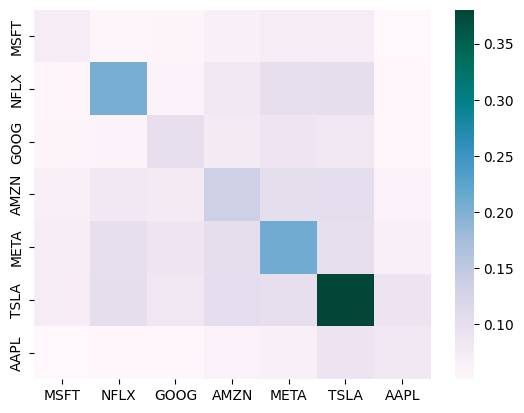

In [37]:
sns.heatmap(covar_US, cmap='PuBuGn')


<Axes: >

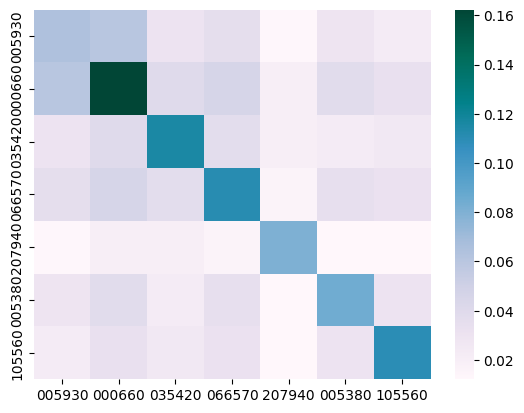

In [38]:
sns.heatmap(covar_KR, cmap='PuBuGn')


In [39]:
port_risk_US= np.dot(weights_US.T, np.dot(covar_US, weights_US))
print(port_risk_US)
port_risk_KR= np.dot(weights_KR.T, np.dot(covar_KR, weights_KR))
print(port_risk_KR)

0.08980019362895923
0.03987985043824461


In [40]:
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

8.090441393872425
-0.17387429349218297


In [41]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)


In [42]:
result=pd.DataFrame(result)
result.columns=['KR', 'US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result


,KR,US
Return,0.013,0.747
Risk,0.040,0.090
Sharpe ratio,-0.174,8.090


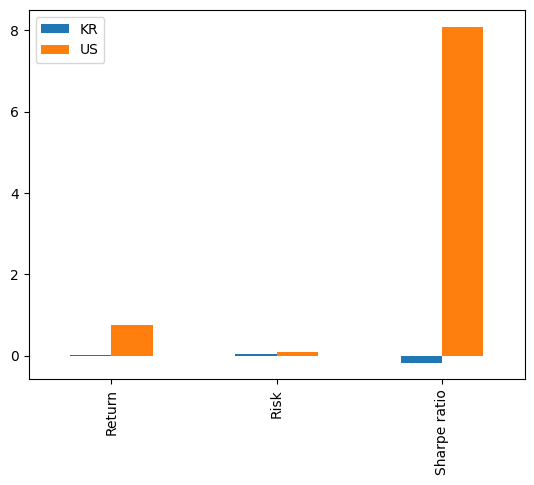

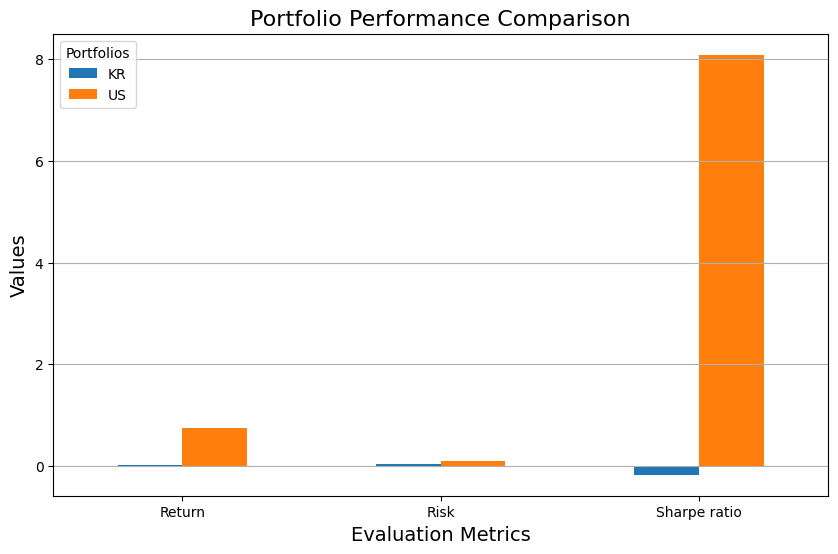

In [43]:
result.plot(kind='bar')
result.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Portfolio Performance Comparison', fontsize=16)
plt.xlabel('Evaluation Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(axis='y')
plt.legend(title='Portfolios')
plt.show()

In [44]:
# Optimization
# Markowitz’s Portfolio Selection Theory

In [45]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

%matplotlib inline
Tech_KR =['005930','000660','035420', '015760', '207940', '051910','005380', '006400','097950']
          #삼성전자,  SK하이닉스, 네이버, 한국전력, 삼성바이로직스, LG화학, 현대차, 삼성SDI, CJ제일제당


In [46]:
# 종가 불러오기
def get_price(companies, start='2021-05-31', end='2025-05-31'):
    df = pd.DataFrame()
    for code in companies:
        try:
            price = fdr.DataReader(code, start, end)['Close']
            df[code] = price
        except Exception as e:
            print(f"Error loading {code}: {e}")
    return df


In [47]:
p_KR=get_price(Tech_KR)
p_KR.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']
p_KR

,SSE,SKH,NVR,KEPCO,SSB,LGC,HDM,SDI,CJJD
Date,,,,,,,,,
2021-05-31,80500,127000,362500,25800,835111,819000,235000,602105,488500
2021-06-01,80600,128500,367000,26100,822263,825000,237000,603084,485500
2021-06-02,80800,126000,363000,25650,808427,807000,238000,598189,477500
2021-06-03,82800,129000,362000,25800,814356,812000,238500,607000,473500
2021-06-04,82200,128500,357000,25800,830169,809000,241500,607979,474000
...,...,...,...,...,...,...,...,...,...
2025-05-26,54700,203000,188000,31700,1043000,187700,181900,166000,224000
2025-05-27,53900,202500,183800,30600,1026000,182900,181900,160200,225000
2025-05-28,55900,208000,187700,30300,1028000,193900,185900,174100,229500


<Axes: xlabel='Date'>

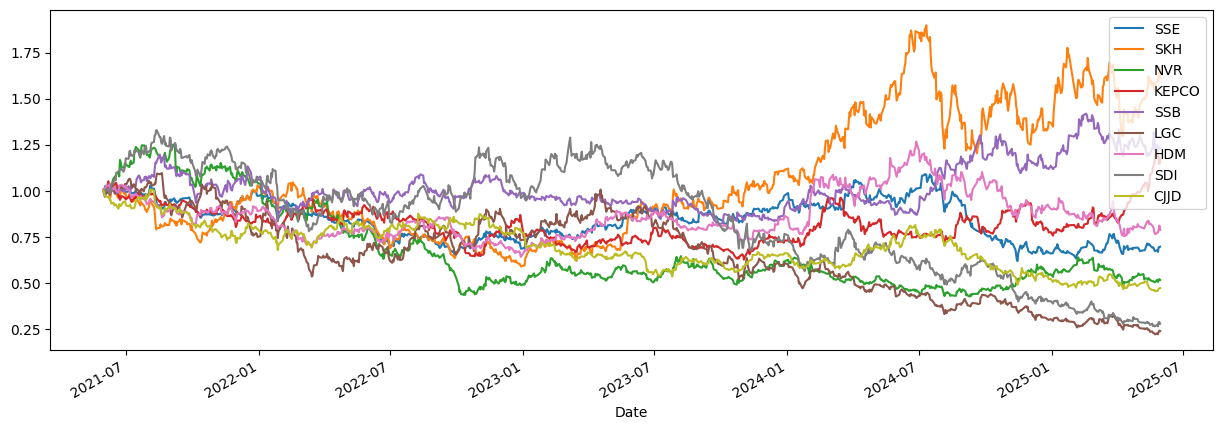

In [48]:
# plotting
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

In [49]:
# 임의의 weights를 생성해서 return, risk를 도시 -> 비중을 아무렇게나 가져감
weights=np.random.rand(len(Tech_KR))
weights=weights/np.sum(weights)
weights

array([0.0419804 , 0.11162639, 0.13353808, 0.13434683, 0.1314213 ,
       0.06040898, 0.20996493, 0.16322175, 0.01349134])

In [50]:
# 임의의 생성된 난수에 대한 Return
r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
port_return= np.dot(weights, r_a)
port_return

np.float64(-0.16913804887416733)

In [51]:
# 임의의 생성된 난수에 대한 Risk
covar_KR=(p_KR/p_KR.shift()-1).cov()*252
port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
port_risk

np.float64(0.040272004009528954)

In [52]:
covar_KR


,SSE,SKH,NVR,KEPCO,SSB,LGC,HDM,SDI,CJJD
SSE,0.064861,0.060406,0.030169,0.014315,0.013285,0.035123,0.029295,0.034851,0.017852
SKH,0.060406,0.162298,0.040210,0.015747,0.020541,0.043415,0.038353,0.039811,0.020343
NVR,0.030169,0.040210,0.115745,0.020739,0.020720,0.037494,0.022711,0.035610,0.020216
KEPCO,0.014315,0.015747,0.020739,0.090760,0.010913,0.019601,0.016622,0.016353,0.016910
SSB,0.013285,0.020541,0.020720,0.010913,0.080321,0.020998,0.012137,0.027038,0.011732
LGC,0.035123,0.043415,0.037494,0.019601,0.020998,0.179514,0.039860,0.114361,0.024542
HDM,0.029295,0.038353,0.022711,0.016622,0.012137,0.039860,0.084590,0.035687,0.020369
SDI,0.034851,0.039811,0.035610,0.016353,0.027038,0.114361,0.035687,0.169536,0.020249
CJJD,0.017852,0.020343,0.020216,0.016910,0.011732,0.024542,0.020369,0.020249,0.079896


In [53]:
# weights의 조합에 따른 포트폴리오 리턴, 리스크
port_returns=[]
port_risks=[]
for ii in range(3000):
  weights=np.random.rand(len(Tech_KR))
  weights=weights/np.sum(weights)

  r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
  port_return= np.dot(weights, r_a)

  covar_KR=(p_KR/p_KR.shift()-1).cov()*252
  port_risk= np.dot(weights.T, np.dot(covar_KR, weights))

  port_returns.append(port_return)
  port_risks.append(port_risk)

In [54]:
port_returns

[np.float64(-0.15495378063766302),
 np.float64(-0.1201038711069758),
 np.float64(-0.1449649731047867),
 np.float64(-0.2034102016849047),
 np.float64(-0.26847480482129715),
 np.float64(-0.1788731303614139),
 np.float64(-0.13284109321508053),
 np.float64(-0.17158348251776656),
 np.float64(-0.2992188844789089),
 np.float64(-0.09985149175637806),
 np.float64(-0.06517346020565527),
 np.float64(-0.4324979061088726),
 np.float64(-0.21332659879977128),
 np.float64(-0.244070670640751),
 np.float64(-0.09839321071822983),
 np.float64(-0.1397819612759726),
 np.float64(-0.35709909133693774),
 np.float64(-0.20749005632132805),
 np.float64(-0.1593770190741768),
 np.float64(-0.3861898164208767),
 np.float64(-0.1597689949993831),
 np.float64(-0.11722478884028045),
 np.float64(-0.22622016148962),
 np.float64(-0.12077138901097739),
 np.float64(-0.30585599635495714),
 np.float64(-0.2676305193153119),
 np.float64(-0.15699099683504425),
 np.float64(-0.2341995266406094),
 np.float64(-0.3045885457520846),
 np

In [55]:
port_risks


[np.float64(0.04629507137541309),
 np.float64(0.03244495883153587),
 np.float64(0.03576727425280993),
 np.float64(0.03907753891624329),
 np.float64(0.03657700108919684),
 np.float64(0.03859940071560141),
 np.float64(0.03628130829234181),
 np.float64(0.03619326430540658),
 np.float64(0.04101891625892412),
 np.float64(0.03566506946518311),
 np.float64(0.03490547946191194),
 np.float64(0.04296797112386712),
 np.float64(0.04309492600356609),
 np.float64(0.04231456529386039),
 np.float64(0.04151991097601339),
 np.float64(0.04832862326390403),
 np.float64(0.03966493754758915),
 np.float64(0.04118551788127167),
 np.float64(0.03454421495149191),
 np.float64(0.05108294858457899),
 np.float64(0.04594721155463166),
 np.float64(0.04179822341146501),
 np.float64(0.04157306490482142),
 np.float64(0.04287152578408855),
 np.float64(0.041764529177504305),
 np.float64(0.03368016889185531),
 np.float64(0.035638414316140676),
 np.float64(0.03883092738255453),
 np.float64(0.04305599288612809),
 np.float64(

In [56]:
port_returns = np.array(port_returns)
port_risks= np.array(port_risks)

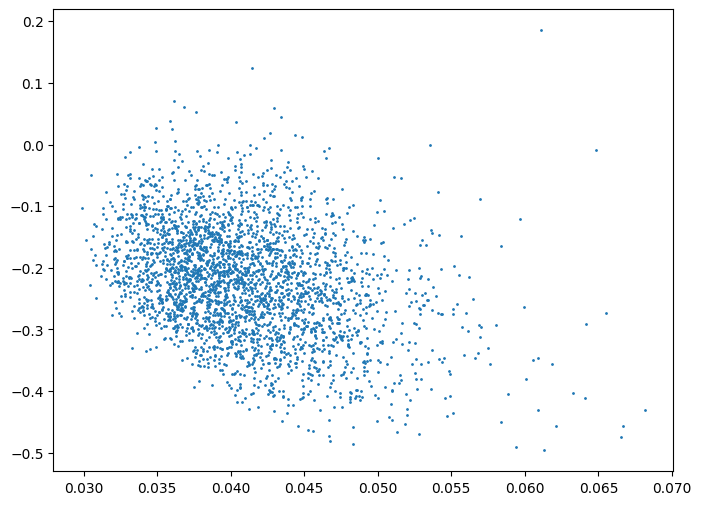

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(port_risks, port_returns, s=1)

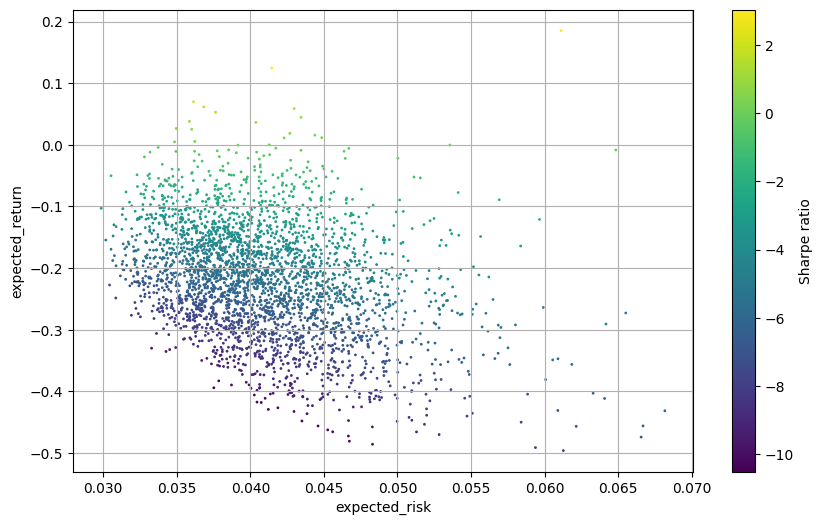

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(port_risks, port_returns, s=1, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()

Optimization (최적화 문제 정의)
- 목적함수 : Sharpe ratio(max), Risk (min)
- 선택변수 : weights
- 제약(constraint) : 모든 weights의 합은 1
- 한계(boundary) : 각 weight는 0과 1 사이
Portfolio Optimization : 세가지 점을 구해봄
- Minimize Portfolio Risk (포트폴리오 리스크 최소)
- Maximize Sharpe Ratio (Sharpe 지수 최대)
- Efficient Frontier (효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오)
*Minimize(목적함수, w0, constraints=, bounds= )


In [59]:
# 목적함수 정의
# 먼저, weights를 넣으면, return, risk, sharpe raio를 return하는 함수를 정의 => 목적함수 정의
def get_stats(weights):
  r_a= (p_KR.iloc[-1])/p_KR.iloc[0]-1
  port_return= np.dot(weights, r_a)
  covar_KR=(p_KR/p_KR.shift(1)-1).cov()*252
  port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
  port_sharpe= port_return/ port_risk
  return [port_return, port_risk, port_sharpe]

def objective_return(weights):
  return -get_stats(weights)[0]

def objective_risk(weights):
  return get_stats(weights)[1]

def objective_sharpe(weights):
  return -get_stats(weights)[2]

In [60]:
get_stats(weights)


[np.float64(-0.152858727289852),
 np.float64(0.035590644573061825),
 np.float64(-4.294913147078801)]

In [61]:
# w0 정의
w0=np.ones(len(Tech_KR))/len(Tech_KR)

In [62]:
# constraints
constraints={'type':'eq', 'fun': lambda x: np.sum(x)-1 }

In [63]:
# bounds
bound=(0,1)
bounds= tuple(bound for ii in range(len(Tech_KR)))


In [64]:
# 최적화 1. Risk 최소
opt_risk = minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
# 최적화 2. Sharpe ratio 최대
opt_sharpe= minimize(objective_sharpe, w0, constraints=constraints, bounds=bounds )

In [65]:
opt_risk['fun'] # 최적화된 risk
opt_risk['x'] # 그때의 weights (포트폴리오)

array([2.08948537e-01, 4.01154804e-18, 5.69637544e-02, 1.76769899e-01,
       2.30563085e-01, 0.00000000e+00, 1.32281625e-01, 8.32394872e-03,
       1.86149150e-01])

In [66]:
-opt_sharpe['fun'] # 최적화된 sharpe ratio
opt_sharpe['x'] # 그때의 weights (포트폴리오)

array([0.00000000e+00, 3.31282074e-01, 7.75902979e-14, 2.94003669e-01,
       3.74714257e-01, 3.65244982e-13, 0.00000000e+00, 3.27922764e-13,
       0.00000000e+00])

In [67]:
# 효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오 (수익률 Min, 수익률 Max, 투자조합갯수)
target_returns= np.linspace(0.05, 0.5, 50) # 최소 5%, 최대 50% 의 수익률, 조합개수는 최소 50개 이상

In [68]:
target_risks=[]
target_port={}
for target_return in target_returns:
  constraints= ({'type':'eq', 'fun': lambda x: np.sum(x)-1 },
                {'type':'eq', 'fun': lambda x:get_stats(x)[0]-target_return})
  opt_target=minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
  target_risks.append(opt_target['fun'])
  target_port[target_return]=opt_target['x']

target_risks=np.array(target_risks)

<Axes: >

<Figure size 1000x600 with 0 Axes>

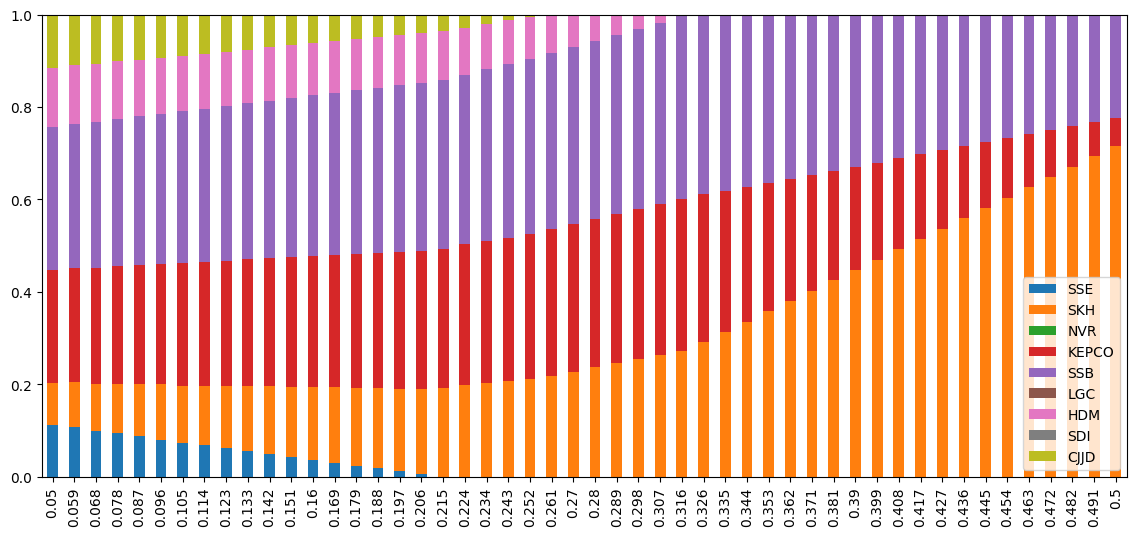

In [69]:
plt.figure(figsize=(10, 6))
w=pd.DataFrame(target_port.values())
w.columns=['SSE', 'SKH', 'NVR', 'KEPCO','SSB', 'LGC', 'HDM', 'SDI', 'CJJD']
w.index=target_returns.round(3)
w.plot(figsize=(14,6), kind='bar', stacked=True)

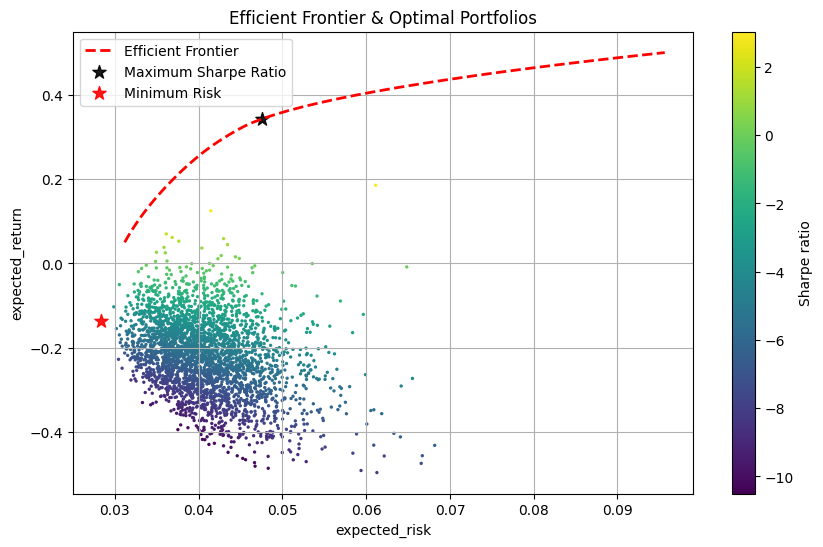

In [70]:
# 효율적 투자선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(port_risks, port_returns, s=2, c=np.array(port_returns)/np.array(port_risks), cmap='viridis')

plt.plot(target_risks, target_returns, 'r--', linewidth=2, label='Efficient Frontier')
plt.colorbar(label='Sharpe ratio')

pt_opt_sharpe=get_stats(opt_sharpe['x'])
plt.scatter(pt_opt_sharpe[1], pt_opt_sharpe[0], marker='*', s=100, c='black', label='Maximum Sharpe Ratio', alpha=0.9)

pt_opt_risk=get_stats(opt_risk['x'])
plt.scatter(pt_opt_risk[1], pt_opt_risk[0], marker='*', s=100, c='red', label='Minimum Risk', alpha=0.9)


plt.title('Efficient Frontier & Optimal Portfolios')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Maximum Sharpe Ratio 포트폴리오
print(f"📈 Maximum Sharpe Ratio Portfolio:")
print(f"  - Expected Return: {pt_opt_sharpe[0]:.4f}")
print(f"  - Expected Risk  : {pt_opt_sharpe[1]:.4f}")
print(f"  - Sharpe Ratio   : {pt_opt_sharpe[2]:.4f}")

# Minimum Risk 포트폴리오
print(f"\n📉 Minimum Risk Portfolio:")
print(f"  - Expected Return: {pt_opt_risk[0]:.4f}")
print(f"  - Expected Risk  : {pt_opt_risk[1]:.4f}")
print(f"  - Sharpe Ratio   : {pt_opt_risk[2]:.4f}")

📈 Maximum Sharpe Ratio Portfolio:
  - Expected Return: 0.3424
  - Expected Risk  : 0.0475
  - Sharpe Ratio   : 7.2064

📉 Minimum Risk Portfolio:
  - Expected Return: -0.1369
  - Expected Risk  : 0.0283
  - Sharpe Ratio   : -4.8305
